# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key


#     # Make API request using city_url
#     # Process the API response

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):   #i % 50 == 0 is checking if i is a multiple of 50 
        set_count += 1   #set_count is incremented each time a new set of 50 cities is started.
        record_count = 0  #record_count is incremented for each city processed within a set of 50 cities.


    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #The %s placeholders will be replaced by the values specified after the % operato

    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        response=requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
{'coord': {'lon': 128.8694, 'lat': 71.6872}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -10.54, 'feels_like': -17.54, 'temp_min': -10.54, 'temp_max': -10.54, 'pressure': 1007, 'humidity': 84, 'sea_level': 1007, 'grnd_level': 1002}, 'visibility': 8791, 'wind': {'speed': 7.79, 'deg': 233, 'gust': 15.11}, 'clouds': {'all': 100}, 'dt': 1711875548, 'sys': {'country': 'RU', 'sunrise': 1711830391, 'sunset': 1711881034}, 'timezone': 32400, 'id': 2015306, 'name': 'Tiksi', 'cod': 200}
Processing Record 2 of Set 1 | mar del plata
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.99, 'feels_like': 13.09, 'temp_min': 13.38, 'temp_max': 14.93, 'pressure': 1017, 'humidity': 63}, 'visibility': 10000, 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-10.54,84,100,7.79,RU,1711875548
1,mar del plata,-38.0023,-57.5575,14.93,63,0,1.79,AR,1711874984
2,fort wellington,6.4000,-57.6000,26.28,82,98,2.76,GY,1711875549
3,thinadhoo,0.5333,72.9333,29.12,72,12,2.93,MV,1711875549
4,necochea,-38.5473,-58.7368,13.81,58,100,2.29,AR,1711875482


In [9]:
# Export the City_Data into a csv
import os
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-10.54,84,100,7.79,RU,1711875548
1,mar del plata,-38.0023,-57.5575,14.93,63,0,1.79,AR,1711874984
2,fort wellington,6.4000,-57.6000,26.28,82,98,2.76,GY,1711875549
3,thinadhoo,0.5333,72.9333,29.12,72,12,2.93,MV,1711875549
4,necochea,-38.5473,-58.7368,13.81,58,100,2.29,AR,1711875482


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

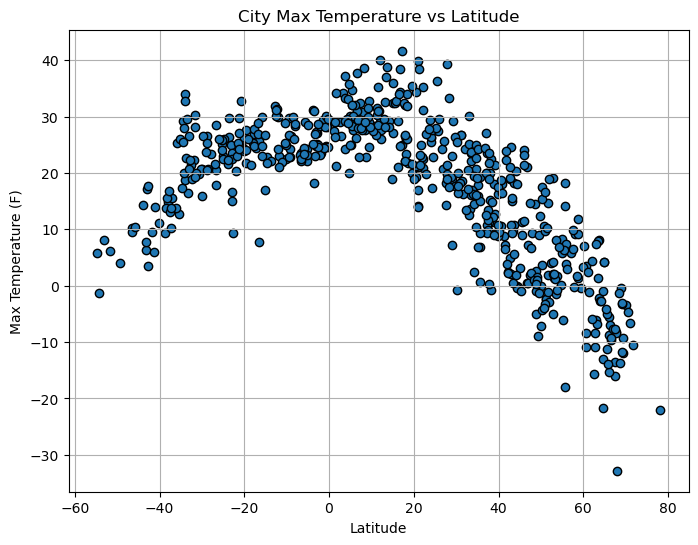

In [28]:
# # Build scatter plot for latitude vs. temperature
# plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# # Incorporate the other graph properties
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (F)')
# plt.title('City Max Temperature vs Latitude')
# plt.grid(True)
# plt.figure(figsize=(8,6))

            
            
# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

# Create a figure
plt.figure(figsize=(8, 6))

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolor='black')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Max Temperature vs Latitude')

# Show gridlines
plt.grid(True)

# Save the figure before displaying
plt.savefig("output_data/Fig1.png")

# Display the plot
plt.show()

#### Latitude Vs. Humidity

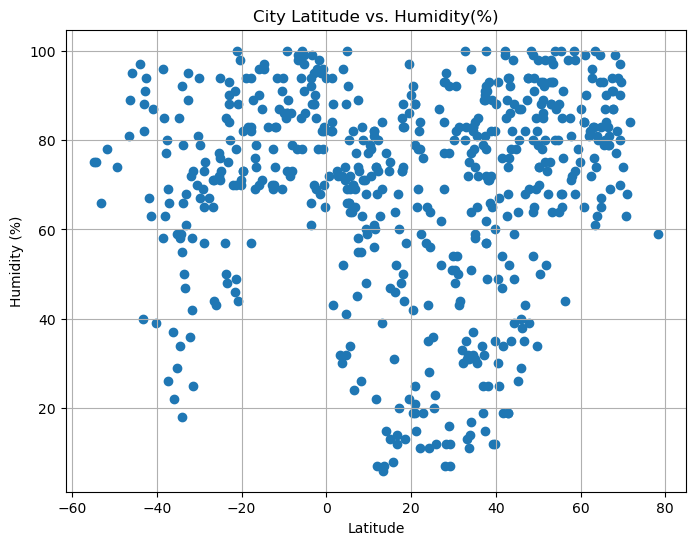

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity(%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

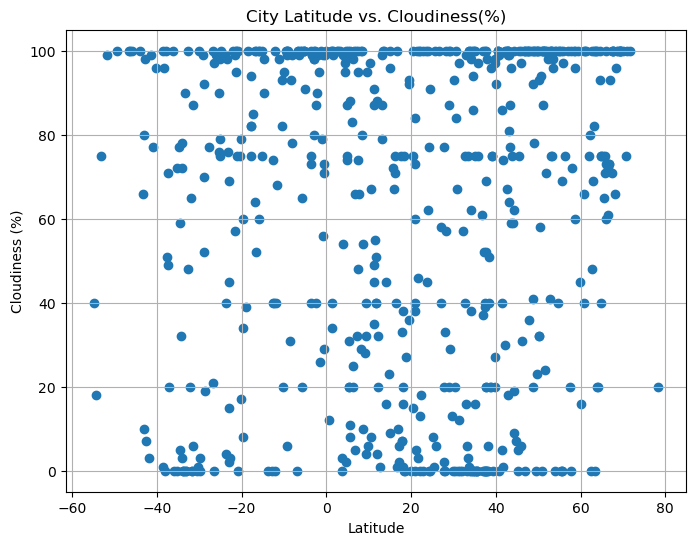

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness(%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

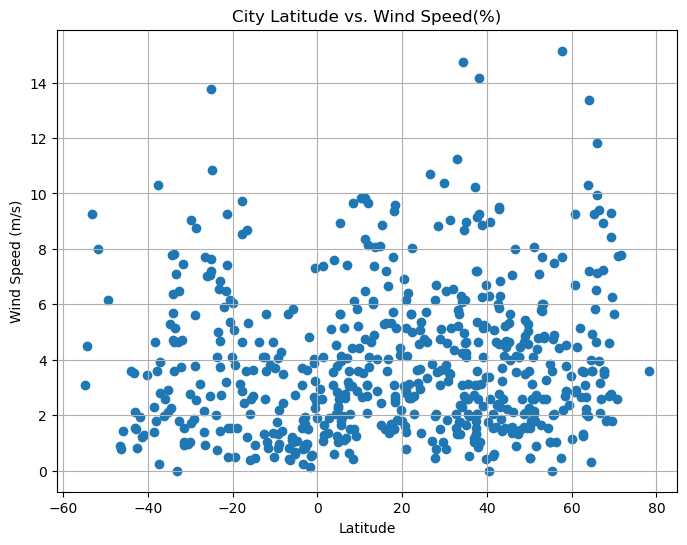

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed(%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

# Repeat the above for other relationships (Humidity vs. Latitude, Cloudiness vs. Latitude, Wind Speed vs. Latitude)



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-10.54,84,100,7.79,RU,1711875548
2,fort wellington,6.4000,-57.6000,26.28,82,98,2.76,GY,1711875549
3,thinadhoo,0.5333,72.9333,29.12,72,12,2.93,MV,1711875549
9,dudinka,69.4058,86.1778,-11.85,97,100,1.79,RU,1711875410
12,cuatro cienegas de carranza,26.9833,-102.0833,20.63,52,40,1.06,MX,1711875553


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,14.93,63,0,1.79,AR,1711874984
4,necochea,-38.5473,-58.7368,13.81,58,100,2.29,AR,1711875482
5,malango,-2.9627,119.9001,24.71,95,80,0.82,ID,1711875550
6,richards bay,-28.7830,32.0377,26.46,57,70,5.61,ZA,1711875550
7,port-aux-francais,-49.3500,70.2167,4.06,74,100,6.16,TF,1711875551


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7499770243615391


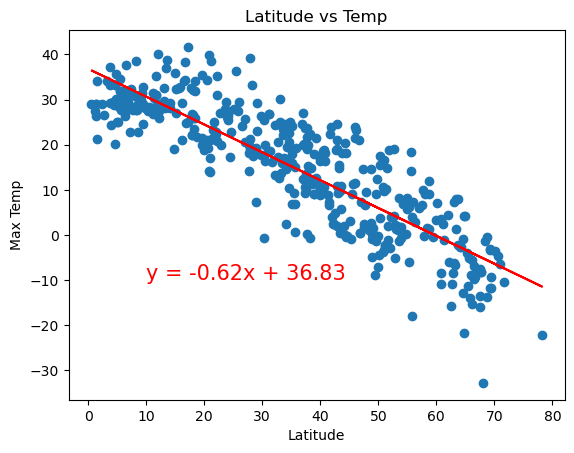

In [20]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
title='Latitude vs Temp'
xlabel='Latitude'
ylabel='Max Temp'
text_coordinates =(10,-10)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

The r-squared is: 0.42627268857511824


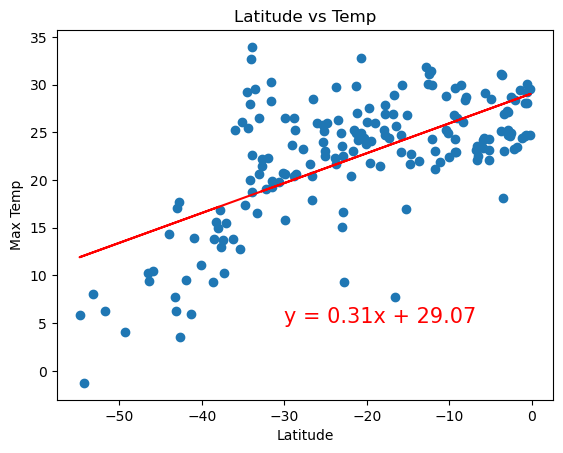

In [25]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
title='Latitude vs Temp'
xlabel='Latitude'
ylabel='Max Temp'
text_coordinates =(-30,5)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

**Discussion about the linear relationship:** No matter in southern hemisphere or northern hemisphere, when the absolute latitude gets smaller, the temperature gets higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09136109669194604


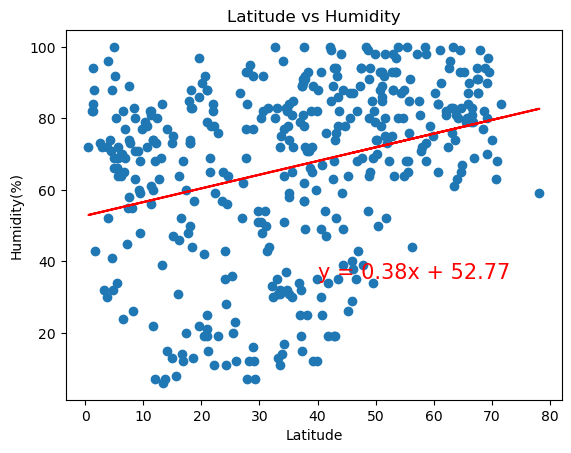

In [26]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
title='Latitude vs Humidity'
xlabel='Latitude'
ylabel='Humidity(%)'
text_coordinates =(40,35)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

The r-squared is: 0.14163962431184782


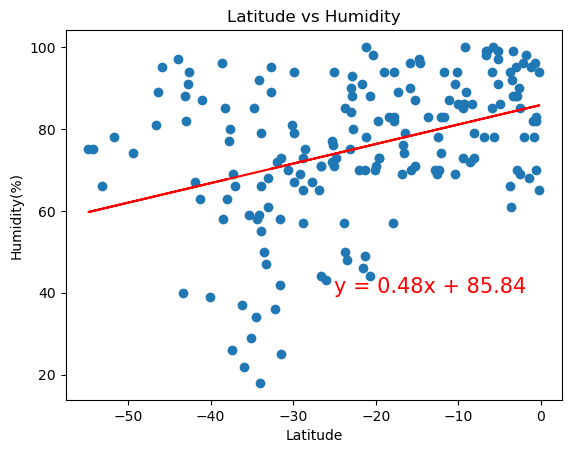

In [27]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
title='Latitude vs Humidity'
xlabel='Latitude'
ylabel='Humidity(%)'
text_coordinates =(-25,40)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

**Discussion about the linear relationship:** Differnet from the relationship between temperature and latitude, when comparing latitude with humidity, both graphs show positive slope of linear regression line. This means that in northern hemisphere, humidity tends to increase when leaving away from the equator. Conversely, in southern hemisphere, the humidity gets higher when approaching equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.051757035186930804


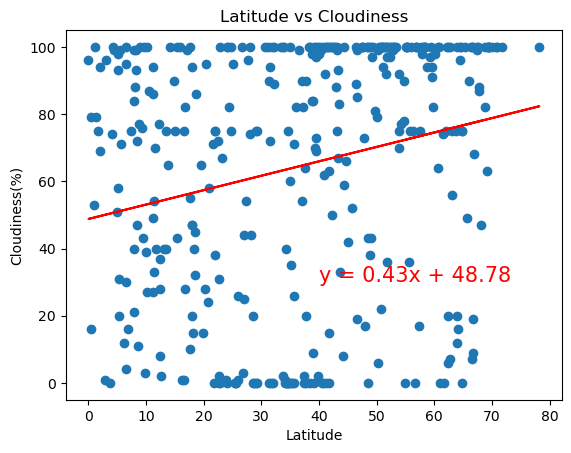

In [92]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
title='Latitude vs Cloudiness'
xlabel='Latitude'
ylabel='Cloudiness(%)'
text_coordinates =(40,30)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

The r-squared is: 0.09673432172965224


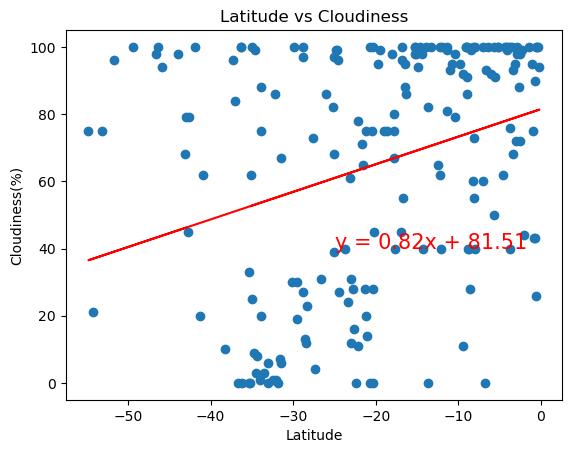

In [91]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
title='Latitude vs Cloudiness'
xlabel='Latitude'
ylabel='Cloudiness(%)'
text_coordinates =(-25,40)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

**Discussion about the linear relationship:** The trendline is simlar to the relationship between Lat and humidity. However, the r-squares of this relationship in northern hemisphere or southern hemisphere are lower than those of Lat vs humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002797184058922349


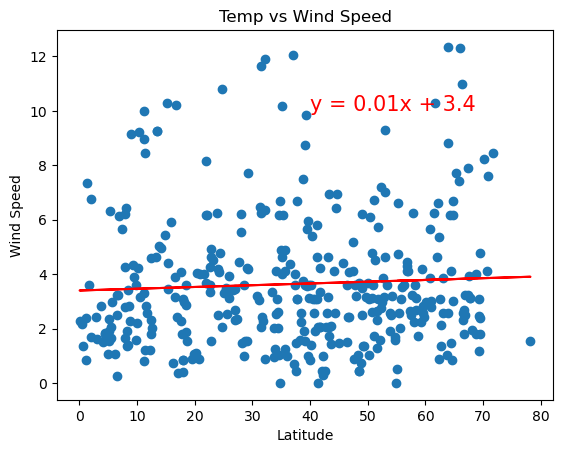

In [87]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
title='Temp vs Wind Speed'
xlabel='Latitude'
ylabel='Wind Speed'
text_coordinates =(40,10)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

The r-squared is: 0.07472293690664612


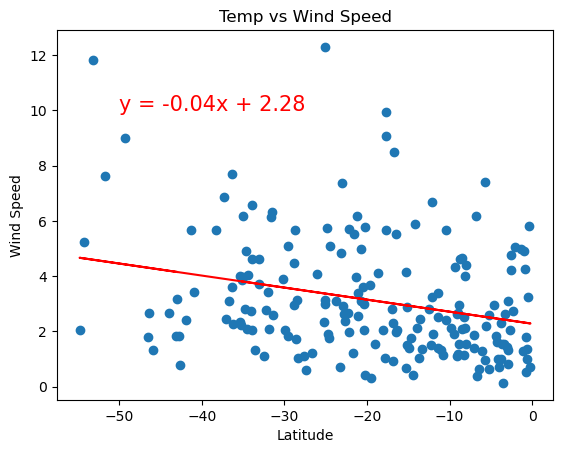

In [90]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
title='Temp vs Wind Speed'
xlabel='Latitude'
ylabel='Wind Speed'
text_coordinates =(-50,10)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates)

**Discussion about the linear relationship:** The r-square of Temp vs Wind Speed in northern hemisphere is low, which shows low explanatory power. In southern hemisphere, the wind speed slightly gets faster when moving away from the equator.